In [41]:
import requests
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd

import tensorflow as tf
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential

In [42]:
# audio = "http://www2.projects.science.uu.nl/memotion/emotifydata/emotifymusic.zip"
# response = requests.get(audio)
# open("audio.zip", "wb").write(response.content)
# import zipfile
# with zipfile.ZipFile("audio.zip", 'r') as zip_ref:
#     zip_ref.extractall('./audio')

# Test

In [43]:
y, sr = librosa.load("audio/pop/5.mp3", duration=60)
stft = np.abs(librosa.stft(y=y))
MFCCs = librosa.feature.mfcc(y=y, sr=sr)
spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

In [44]:
ipd.Audio(y, rate=sr)

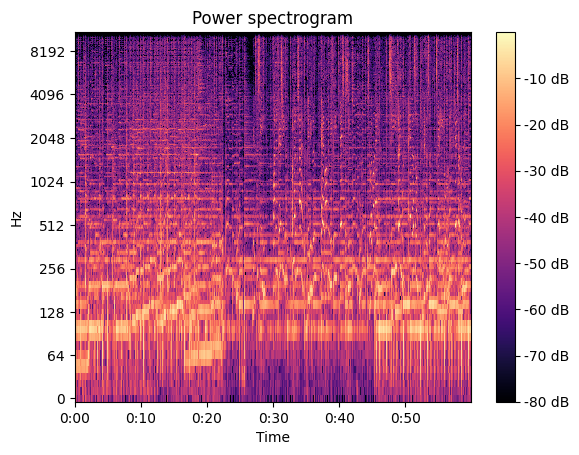

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
img = librosa.display.specshow(
    librosa.amplitude_to_db(stft, ref=np.max), y_axis="log", x_axis="time", ax=ax
)
ax.set_title("Power spectrogram")
fig.colorbar(img, ax=ax, format="%+2.0f dB")

# For now I'll try to use only spectogram.

In [46]:
def get_spec(y):
    return np.abs(librosa.stft(y, n_fft=255, hop_length=512))

In [47]:
def show_spec(spec):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(
        librosa.amplitude_to_db(spec, ref=np.max), y_axis="log", x_axis="time", ax=ax
    )

    ax.set_title("Power spectrogram")
    fig.colorbar(img, ax=ax, format="%+2.0f dB")

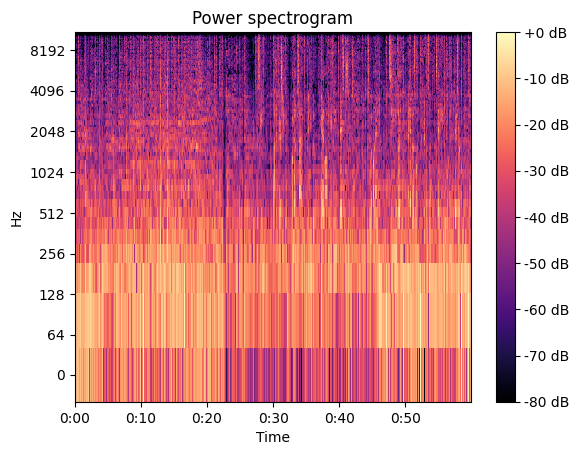

In [48]:
s = get_spec(y)
show_spec(s)


In [49]:
s.shape


(128, 2584)

In [50]:
librosa.get_duration(filename="audio\classical/1.mp3")


60.192743764172334

In [52]:
# This code was adapted from Nicolas Gervais on https://stackoverflow.com/questions/59241216/padding-numpy-arrays-to-a-specific-size on 1/10/2021
def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """

    h = array.shape[0]
    w = array.shape[1]
    a = max((xx - h) // 2, 0)
    aa = max(0, xx - a - h)
    b = max(0, (yy - w) // 2)
    bb = max(yy - b - w, 0)
    return np.pad(array, pad_width=((a, aa), (b, bb)), mode="constant")


In [53]:
from pathlib import Path
x_list = []
audio_path = Path('audio')
genres = audio_path.glob("*")
for genre in genres:
    for i in range(1,5,1):
        print(f"{genre}/{i}.mp3")
        duration = int(librosa.get_duration(filename=f"{genre}/{i}.mp3"))
        print(duration)
        y, sr = librosa.load((f"{genre}/{i}.mp3"), duration=duration)
        x = get_spec(y)
        x_list.append([padding(x, 128, 3000)])


audio\classical/1.mp3
60
audio\classical/2.mp3
60
audio\classical/3.mp3
60
audio\classical/4.mp3
60
audio\classical/5.mp3
60
audio\classical/6.mp3
60
audio\classical/7.mp3
60
audio\classical/8.mp3
60
audio\classical/9.mp3
60
audio\classical/10.mp3
60
audio\classical/11.mp3
60
audio\classical/12.mp3
60
audio\classical/13.mp3
60
audio\classical/14.mp3
60
audio\classical/15.mp3
60
audio\classical/16.mp3
42
audio\classical/17.mp3
60
audio\classical/18.mp3
60
audio\classical/19.mp3
60
audio\classical/20.mp3
60
audio\classical/21.mp3
60
audio\classical/22.mp3
60
audio\classical/23.mp3
60
audio\classical/24.mp3
60
audio\classical/25.mp3
60
audio\classical/26.mp3
60
audio\classical/27.mp3
60
audio\classical/28.mp3
60
audio\classical/29.mp3
60
audio\classical/30.mp3
60
audio\classical/31.mp3
60
audio\classical/32.mp3
60
audio\classical/33.mp3
60
audio\classical/34.mp3
60
audio\classical/35.mp3
60
audio\classical/36.mp3
60
audio\classical/37.mp3
60
audio\classical/38.mp3
60
audio\classical/39.mp

In [70]:
x_list


[[array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)],
 [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)],
 [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)],
 [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [

In [ ]:
def get_features():
    from pathlib import Path
    y_value = []
    label = []
    audio_path = Path('audio')
    genres = audio_path.glob("*")
    for genre in genres:
        for i in range(1, 5, 1):
            print(f"{genre}/{i}.mp3")
            duration = int(librosa.get_duration(filename=f"{genre}/{i}.mp3"))
            print(duration)
            y, _ = librosa.load((f"{genre}/{i}.mp3"), duration=duration)
            y = get_spec(y)
            y_value.append([y, f"{genre}/{i}.mp3"])
    return y_value

In [71]:
x_tensor = tf.convert_to_tensor(x_list)


In [72]:
x_tensor


<tf.Tensor: shape=(400, 1, 128, 3000), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0.,

In [127]:
def get_spec(y):
    return np.abs(librosa.stft(y, n_fft=254, hop_length=1024))

In [128]:
test = get_spec(y)

In [129]:
test.shape

(128, 1292)

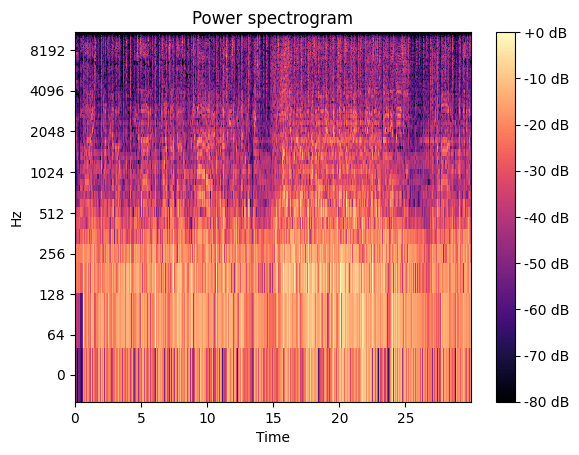

In [130]:
show_spec(test)

In [133]:
test_tensor = tf.convert_to_tensor(test)
test_tensor = tf.expand_dims(test_tensor, 0)
test_tensor

<tf.Tensor: shape=(1, 128, 1292), dtype=float32, numpy=
array([[[4.83673865e-12, 1.06413245e-01, 1.86689701e-02, ...,
         6.22760296e+00, 1.16035595e+01, 9.16833878e+00],
        [3.62829536e-12, 8.55000317e-02, 1.38353264e+00, ...,
         1.29757843e+01, 1.05813684e+01, 1.31844196e+01],
        [3.48724370e-12, 7.36706480e-02, 1.92222631e+00, ...,
         6.85051203e+00, 7.63554096e+00, 6.97103119e+00],
        ...,
        [4.10184094e-13, 9.08941729e-06, 1.07341228e-04, ...,
         1.46757090e-03, 5.92707249e-04, 5.82868350e-04],
        [3.30288775e-13, 6.01310694e-06, 3.38850950e-05, ...,
         3.37119971e-04, 2.06294120e-04, 1.65761390e-04],
        [3.00444646e-13, 7.68280006e-06, 3.70998896e-05, ...,
         1.55836256e-04, 1.53028028e-04, 2.32645092e-04]]], dtype=float32)>